In [2]:
!pip install seaborn -q

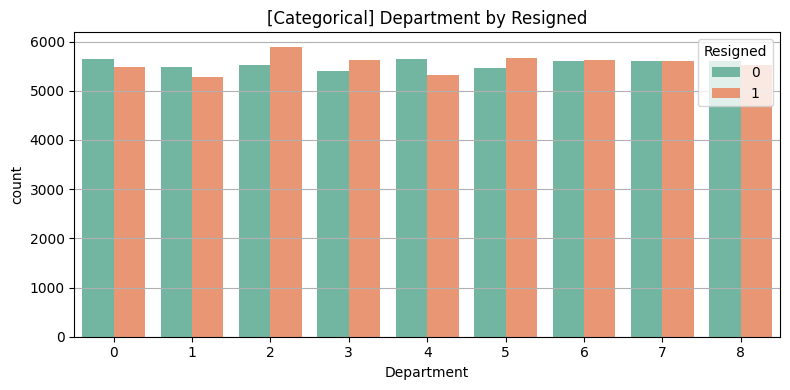

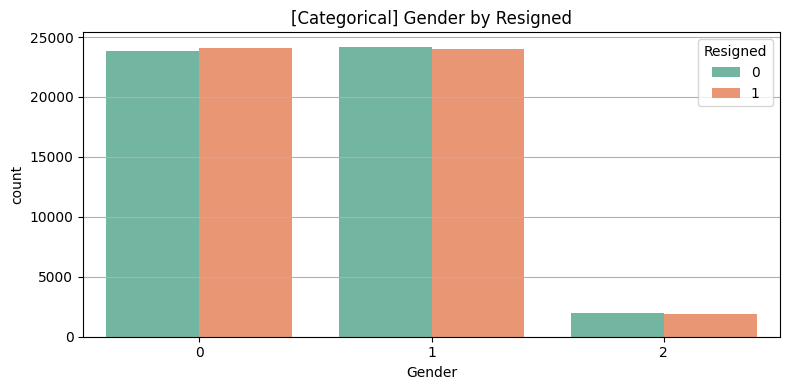

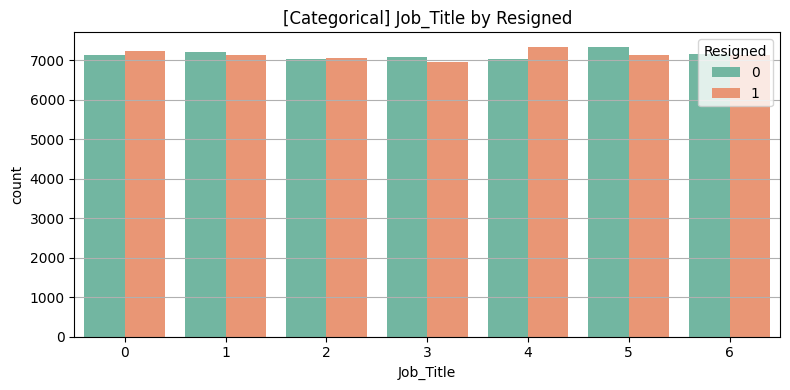

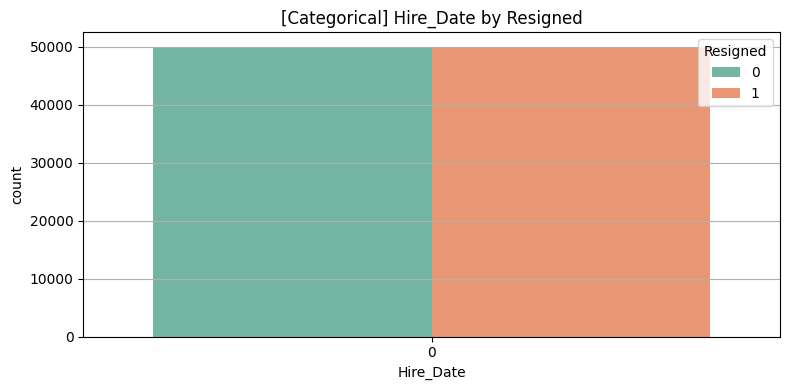

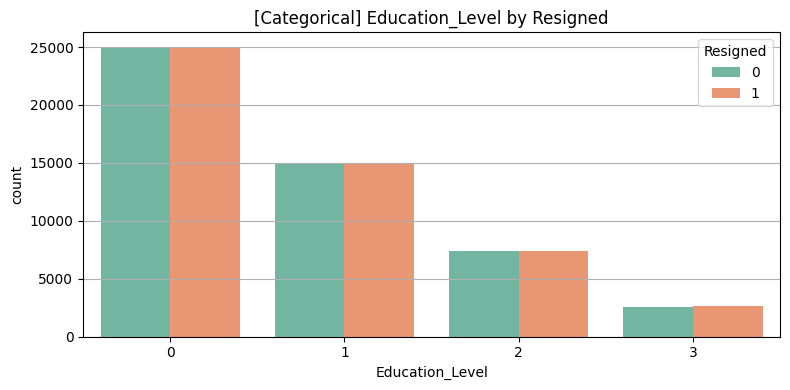

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

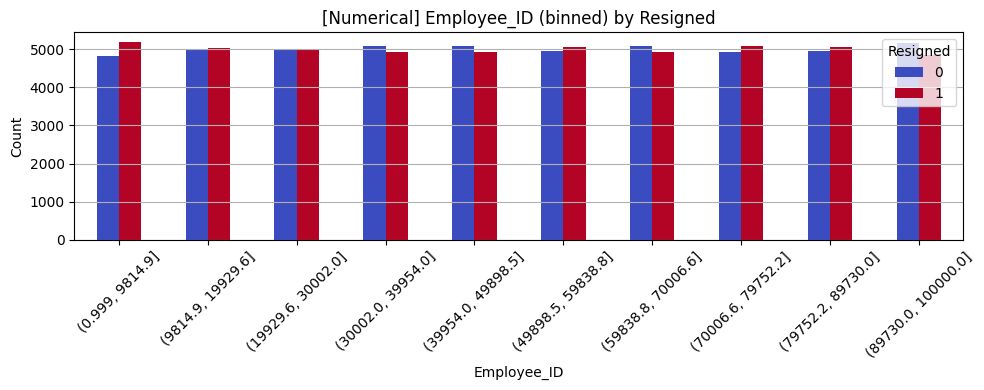

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

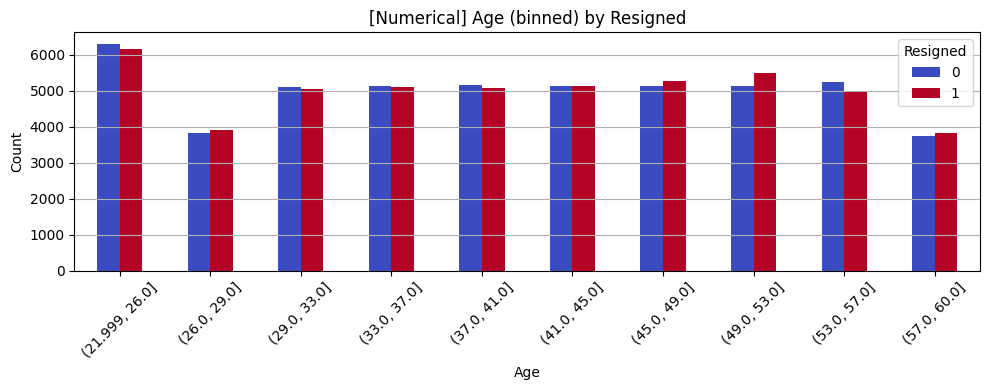

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

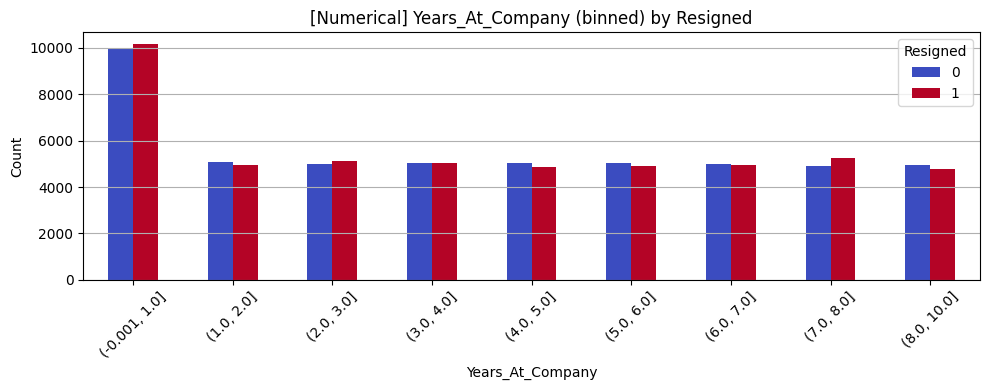

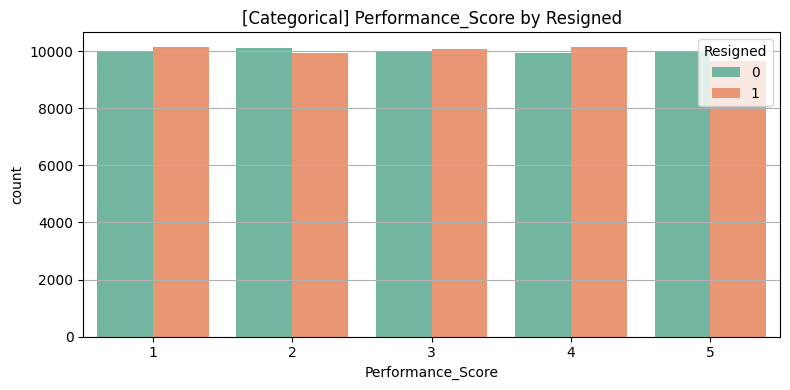

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

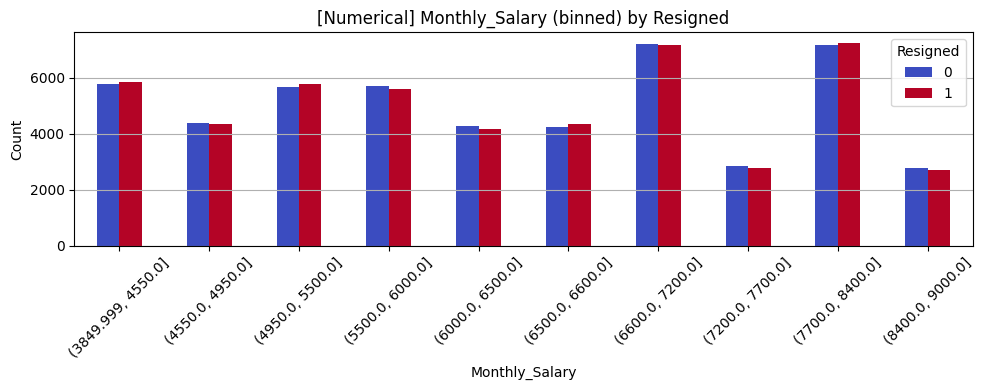

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

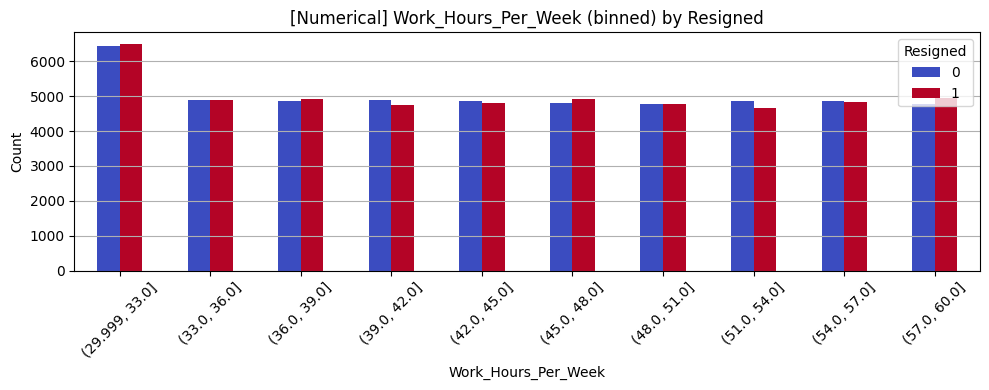

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

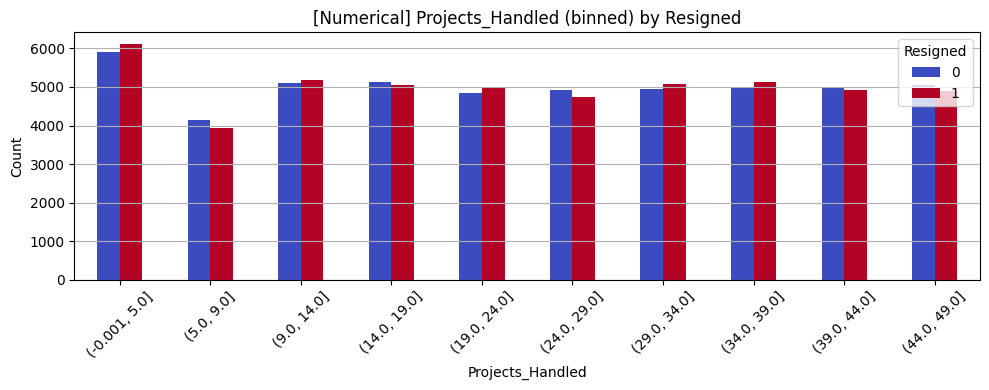

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

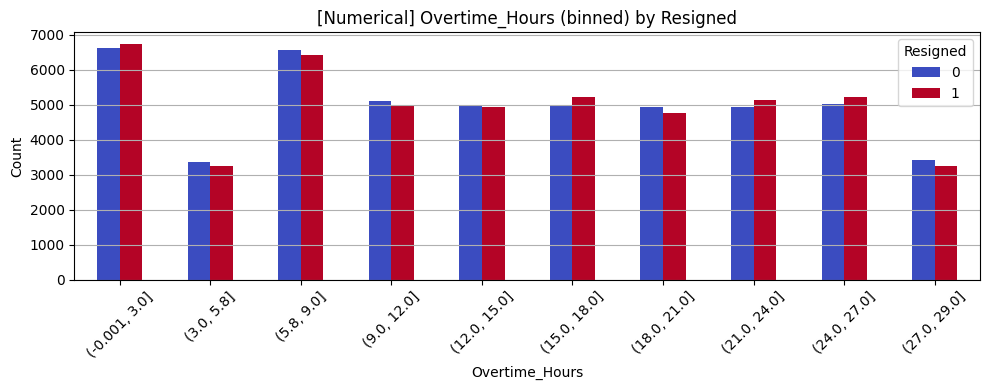

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

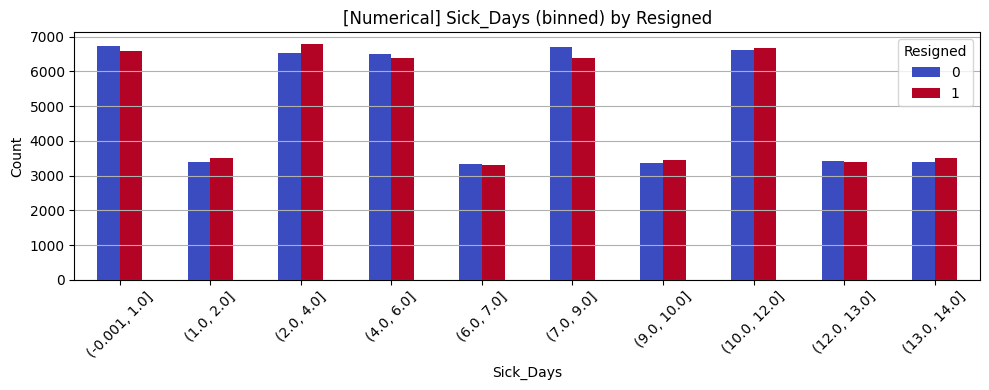

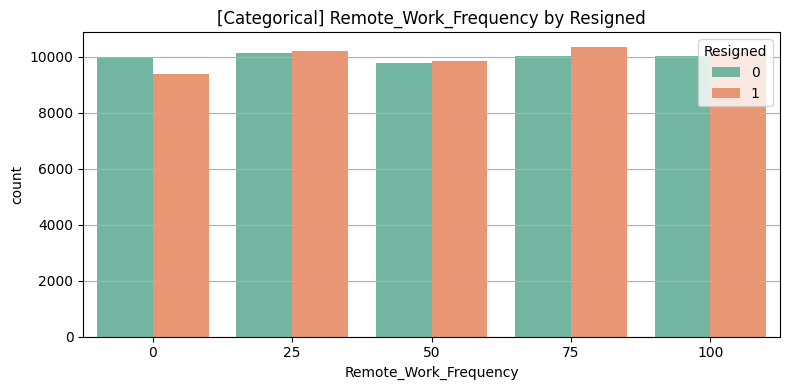

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

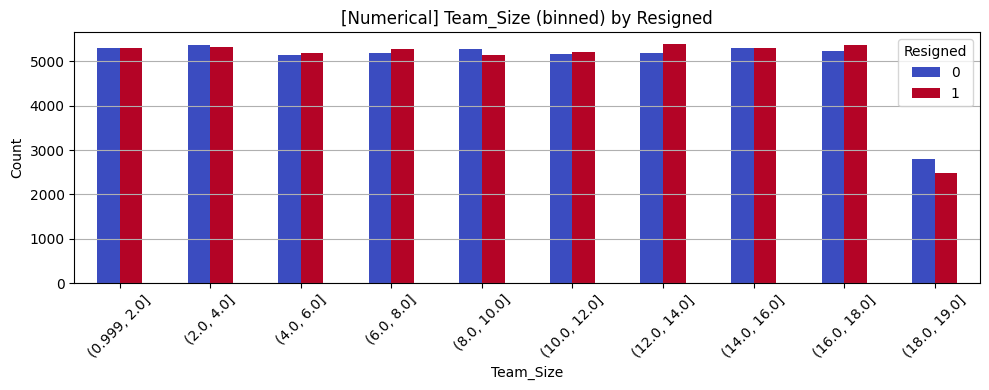

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

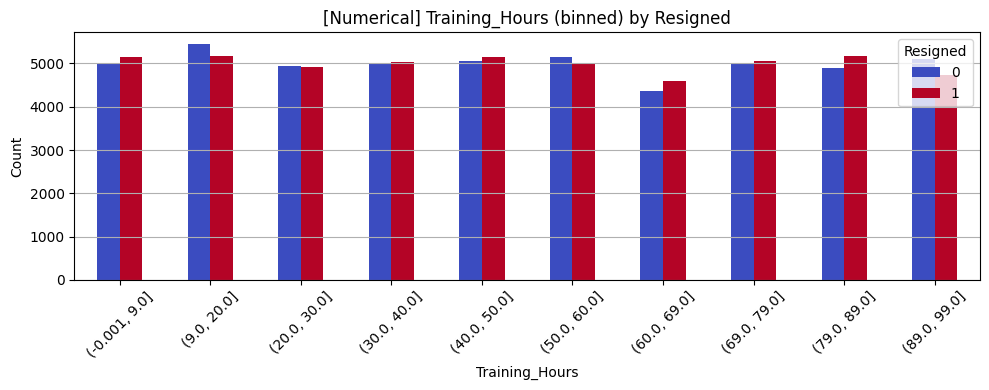

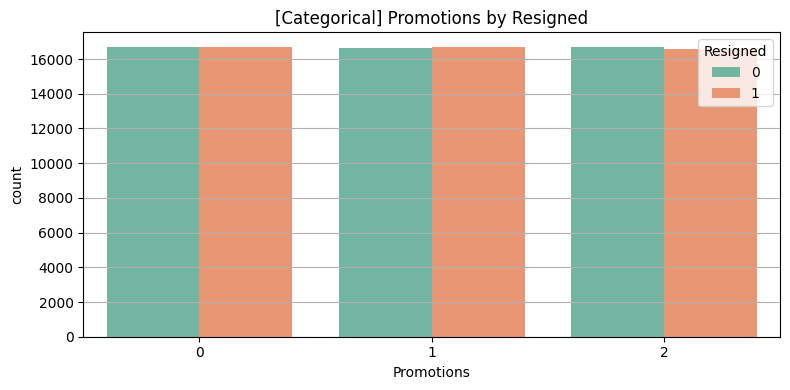

/tmp/ipython-input-3096551723.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

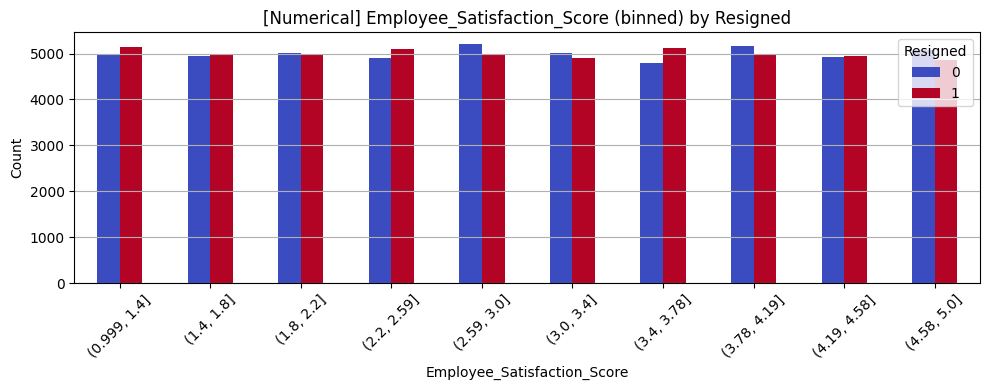

In [3]:
### 전처리 단계, 막대그래프를 보고

# 🔧 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 📁 데이터 로드 (업로드한 employee.csv 파일)
df = pd.read_csv('/content/employee.csv')
df['Resigned'] = df['Resigned'].astype(int)

# ✅ 범주형/수치형 컬럼 분리
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop('Resigned', axis=1).columns.tolist()

# ✅ 라벨 인코딩 (그래프 그리기 위함)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# ✅ 오버샘플링 + 언더샘플링 (각 5만명)
df_0 = df[df['Resigned'] == 0]
df_1 = df[df['Resigned'] == 1]

df_0_sampled = df_0.sample(n=50000, random_state=42)

if len(df_1) >= 50000:
    df_1_sampled = df_1.sample(n=50000, random_state=42)
else:
    repeat_count = 50000 // len(df_1) + 1
    df_1_repeated = pd.concat([df_1] * repeat_count, axis=0).reset_index(drop=True)
    df_1_sampled = df_1_repeated.iloc[:50000]

df_balanced = pd.concat([df_0_sampled, df_1_sampled]).sample(frac=1.0, random_state=42).reset_index(drop=True)

# ✅ 📊 변수별 분포 시각화 함수
def plot_feature_distribution_by_resigned(df, feature_list):
    for col in feature_list:
        plt.figure(figsize=(8, 4))

        if df[col].nunique() <= 10:
            # 범주형 변수 → countplot
            sns.countplot(data=df, x=col, hue='Resigned', palette='Set2')
            plt.title(f"[Categorical] {col} by Resigned")
        else:
            # 수치형 변수 → 구간 나누어 bar plot
            bins = pd.qcut(df[col], q=10, duplicates='drop')
            temp = pd.concat([bins, df['Resigned']], axis=1)
            grouped = temp.groupby([col, 'Resigned']).size().unstack(fill_value=0)

            grouped.plot(kind='bar', stacked=False, figsize=(10, 4), colormap='coolwarm')
            plt.title(f"[Numerical] {col} (binned) by Resigned")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.xticks(rotation=45)

        plt.tight_layout()
        plt.grid(axis='y')
        plt.show()

# ✅ 전체 feature 시각화 실행
plot_feature_distribution_by_resigned(df_balanced, categorical_cols + numerical_cols)